# Árboles de decisión vs regresión lineal
M2U5 - Ejercicio 2

## ¿Qué vamos a hacer?
- Comparar la precisión y el comportamiento de los árboles de decisión frente a la regresión lineal tradicional

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Instrucciones
En algunas ocasiones se estima que los árboles de regresión pueden no tener tanta precisión y caer en más sobreajuste frente a la regresión lineal tradicional, especialmente con un alto nº de características.

En este ejercicio, vamos a seguir los pasos habituales para entrenar 2 modelos de regresión lineal: un árbol de decisión y un Lasso.

In [26]:
# TODO: Importa todos los módulos necesarios en esta celda
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline




## Generar un dataset sintético

Genera un dataset sintético con un término de error algo acusado y pocas características, de forma manual o con Scikit-learn:

In [2]:
# TODO: Genera un dataset sintético, con pocas características y un término de error notable
# No añadas término de bias a X

m = 1000
n = 9

X, y, theta_true = make_regression(n_samples=m, n_features=n, noise= 0.3, coef=True, random_state=42)



# Comprueba los valores y dimensiones de los vectores
print('Theta a estimar y sus dimensiones:')
print(theta_true)
print("Theta shape:", theta_true.shape)
print()

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10])
print(y[:10])

print('Dimensiones de X e Y:')
print("X shape:", X.shape)
print("y shape:", y.shape)

Theta a estimar y sus dimensiones:
[32.28144977 76.36319155 83.95667065 54.54881481 42.11913798 88.11973396
 14.72738085 68.79840215 45.25645034]
Theta shape: (9,)

Primeras 10 filas y 5 columnas de X e Y:
[[-0.56076091 -1.58217676  0.71587274 -2.0362205   0.40421287 -1.6728939
   0.04749347 -0.94039892 -0.24907184]
 [-0.62591602 -2.95424894 -0.71551299 -0.97825494 -1.05880015 -0.82461201
   0.122243   -0.64172714 -0.41896345]
 [ 0.02874482  0.36867331  0.64548418  1.27845186  0.74625357 -1.35985614
   0.19109907 -0.39333881  0.04643655]
 [-0.58307744  0.81573721  0.73487779 -0.16712171  0.49097495  1.60734558
   0.28257995  0.86047349 -0.24869113]
 [-0.43638589  0.54628425  0.56091945 -0.1096098   1.59864717 -0.25879606
  -0.08836296  0.00642227 -0.37001103]
 [ 0.54578671 -0.61358761  0.42178007 -2.1715714   1.29127384 -0.27754426
  -0.0081132   0.19624094  0.15808923]
 [ 0.66226298 -0.05080079  1.28638214 -1.03911117 -0.6281494   0.72679405
   1.68754806  0.16064994  0.24511428]
 [-1

## Preprocesar los datos

- Reordena los datos aleatoriamente.
- Divídelos en subsets de entrenamiento y test.

*Nota*: De nuevo usaremos K-fold para la validación cruzada.

In [5]:
# TODO: Reordena los datos aleatoriamente, dividelos en subsets de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Optimizar los modelos por validación cruzada

- Entrena un modelo por cada valor de regularización o profundidad máx. a considerar.
- Entrénalos y evalúalos sobre una divisón del subset de entrenamiento por K-fold.
- Escoge el modelo y su regularización óptimos.

Considera unos parámetros similares a los de ejercicios pasados:
- Profundidad máxima en el rango `[1, 8]`
- Parámetro de regularización L2 *alpha* en el rango logarítmico `[0, 0.1]: 0.1, 0.01, 0.001, 0.0001`, etc.

Puedes copiar las celdas de ejercicios anteriores y modificarlas

In [16]:
# TODO: Entrena un modelo diferente sobre un fold de K-fold diferente para árbol de regresión y Lasso

max_depths = range(1, 9)

best_mse_tree = float('inf')
best_depth = None

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_medio = -np.mean(scores)
    print(f"Depth {max_depth} → MSE CV medio: {mse_medio:.4f}")

    if mse_medio < best_mse_tree:
        best_mse_tree = mse_medio
        best_depth = max_depth

print(f"\nMejor profundidad: {best_depth} con MSE {best_mse_tree:.4f}")


print()



alphas = [0.1, 0.01, 0.001, 0.0001]

best_mse_lasso = float('inf')
best_alpha = None

for alpha in alphas:
    model = make_pipeline(StandardScaler(),Lasso(alpha=alpha, max_iter=10000, random_state=42))

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    mse_medio = -np.mean(scores)  # lo pasamos a MSE positivo. [web:6][web:8]
    print(f"Alpha {alpha} → MSE CV medio: {mse_medio:.4f}")

    if mse_medio < best_mse_lasso:
        best_mse_lasso = mse_medio
        best_alpha = alpha

print(f"\nMejor alpha: {best_alpha} con MSE {best_mse_lasso:.4f}")




Depth 1 → MSE CV medio: 29682.5401
Depth 2 → MSE CV medio: 24113.7815
Depth 3 → MSE CV medio: 20455.7403
Depth 4 → MSE CV medio: 19876.8043
Depth 5 → MSE CV medio: 18045.8898
Depth 6 → MSE CV medio: 17195.4660
Depth 7 → MSE CV medio: 17677.6557
Depth 8 → MSE CV medio: 16925.5131

Mejor profundidad: 8 con MSE 16925.5131

Alpha 0.1 → MSE CV medio: 0.1758
Alpha 0.01 → MSE CV medio: 0.0860
Alpha 0.001 → MSE CV medio: 0.0852
Alpha 0.0001 → MSE CV medio: 0.0852

Mejor alpha: 0.0001 con MSE 0.0852


## Evaluar el modelo sobre el subset de test

Finalmente, vamos a evaluar los mejores modelos de árbol de decisión y Lasso sobre el subset de test.

Para ello, calcula sus métricas de MSE, RMSE y R^2 score y representa gráficamente las predicciones del modelo vs el subset de test:

In [28]:
# TODO: Evalúa el modelo con MSE y R^2 sobre el subset de test para mejor árbol y Lasso

best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha, max_iter=10000, random_state=42))

best_tree_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

y_pred_tree = best_tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print('Árbol - Error cuadrático medio: {:.2f}'.format(mse_tree))
print('Árbol - Raíz del error cuadrático medio: {:.2f}'.format(rmse_tree))
print('Árbol - Coeficiente de determinación (R^2): {:.2f}'.format(r2_tree))
print()

y_pred_lasso = best_lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Lasso - Error cuadrático medio: {:.2f}'.format(mse_lasso))
print('Lasso - Raíz del error cuadrático medio: {:.2f}'.format(rmse_lasso))
print('Lasso - Coeficiente de determinación (R^2): {:.2f}'.format(r2_lasso))

Árbol - Error cuadrático medio: 16101.52
Árbol - Raíz del error cuadrático medio: 126.89
Árbol - Coeficiente de determinación (R^2): 0.53

Lasso - Error cuadrático medio: 0.09
Lasso - Raíz del error cuadrático medio: 0.29
Lasso - Coeficiente de determinación (R^2): 1.00


Finalmente, comprueba su posible desviación o sobreajuste y precisión final representando gráficamente los residuos de ambos modelos:

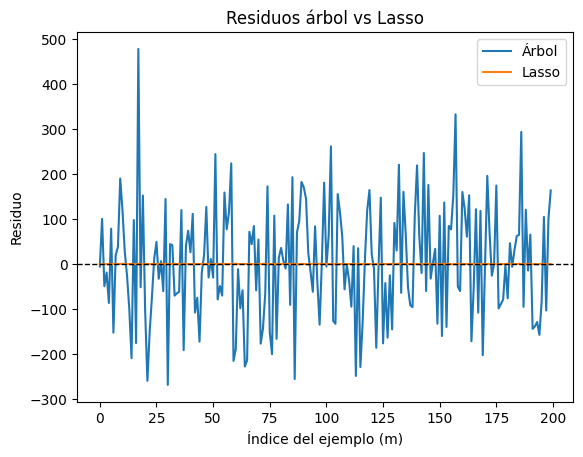

In [30]:
# 1. Residuos (y_real - y_predicho)

residuos_tree = y_test - y_pred_tree
residuos_lasso = y_test - y_pred_lasso

# 2. Índice de los ejemplos (m)
m = np.arange(len(y_test))

plt.figure(3)
plt.title('Residuos árbol vs Lasso')
plt.xlabel('Índice del ejemplo (m)')
plt.ylabel('Residuo')

plt.plot(m, residuos_tree, label='Árbol', color='tab:blue')
plt.plot(m, residuos_lasso, label='Lasso', color='tab:orange')

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # línea de referencia
plt.legend()
plt.show()


Claramente el modelo lasso presente sobreajuste